In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class SteepestDescentNumericalLr:
    def __init__(self): ...
    
    def optimize(self, 
                 func,  
                 x0, 
                 lr=0.01,
                 h=1e-5,
                 max_iterations=1000,
                 stop_value=None,
                 lr_schedule_type='fixed'):
        
        x = np.array(x0, dtype=float)
        trayectory = []
        lr_history = []
        initial_lr = lr
        lr_history.append(initial_lr)
        
        for i in range(max_iterations):
            f_val = func(x)
            trayectory.append(f_val)

            if stop_value and f_val <= stop_value:
                    break

            grad = self.numerical_gradient(func, x, h=h)

            lr = self.get_learning_rate(
                schedule_type=lr_schedule_type,
                initial_lr=initial_lr,
                iteration=i,
                max_iterations=max_iterations,
                func=func,
                x=x,
                grad=grad
            )
            lr_history.append(lr)

            x = x - lr * grad

        return x, trayectory, lr_history

    def numerical_gradient(self, f, x, h):
        n = len(x)
        grad = np.zeros(n)
        
        for i in range(n):
            x_plus = x.copy()
            x_minus = x.copy()
            
            x_plus[i] += h
            x_minus[i] -= h

            grad[i] = (f(x_plus) - f(x_minus)) / (2*h)

        return grad
    
    def get_learning_rate(self, schedule_type, initial_lr, iteration, max_iterations, func, x, grad):
        if schedule_type == 'fixed':
            return initial_lr
        elif schedule_type == 'linear_decreasing':
            return self.linear_decreasing_lr(initial_lr, iteration, max_iterations)
        elif schedule_type == 'adaptive':
            return self.adaptive_lr(initial_lr, iteration)
        elif schedule_type == 'intelligent':
            return self.intelligent_lr(func, x, grad, initial_lr)
        else:
            raise ValueError(f"Estrategia de lr desconocida: {schedule_type}")

    def linear_decreasing_lr(self, initial_lr, iteration, max_iterations):
        return initial_lr * (1 - iteration / max_iterations)
    
    def adaptive_lr(self, initial_lr, iteration):
        return initial_lr / (1 + 0.1 * np.sqrt(iteration + 1))

    def intelligent_lr(self, func, x, grad, initial_lr):
        alpha = initial_lr
        c1 = 1e-4
        rho = 0.5
        max_backtracks = 50
        min_alpha = 1e-10
        
        f_x = func(x)
        grad_norm_sq = np.dot(grad, grad)
        
        if grad_norm_sq < 1e-12:
            return min_alpha
        
        directional_derivative = -grad_norm_sq
        backtrack_count = 0
        
        while backtrack_count < max_backtracks and alpha > min_alpha:
            x_new = x - alpha * grad
            f_new = func(x_new)

            if f_new <= f_x + c1 * alpha * directional_derivative:
                break
                
            alpha *= rho
            backtrack_count += 1
        
        return max(alpha, min_alpha)
    
    def plot(self, trayectory, title="Descenso Más Pronunciado"):
        plt.figure(figsize=(8, 6))
        plt.plot(trayectory)
        plt.title(title)
        plt.xlabel('Iteraciones')
        plt.ylabel('Valor de la función')
        plt.grid(True)
        plt.show()

In [12]:
def function4(x):
    """10⁹x_1²+x_2²"""
    return 1e9 * x[0]**2 + x[1]**2

# MÉTODO 1: ESCALAR LAS VARIABLES f(Cx, Cy)
# Para equilibrar los coeficientes, necesitamos que ambos sean similares
# Si queremos que ambos coeficientes sean 1, necesitamos:
# C₁² * 10⁹ = 1  =>  C₁ = 1/√(10⁹) = 1/31622.77
# C₂² * 1 = 1     =>  C₂ = 1

import math

def function4_normalized(x):
    C1 = 1.0 / math.sqrt(1e9)
    C2 = 1.0
    x1_scaled = C1 * x[0]
    x2_scaled = C2 * x[1]
    
    return 1e9 * x1_scaled**2 + x2_scaled**2

In [13]:
x0 = [1.5, 1.5]
sd_algorithm = SteepestDescentNumericalLr()

======= OPTIMIZACIÓN DE LA FUNCIÓN (4) =======
TAMAÑO DE PASO FIJO
Valor óptimo encontrado: [3.05555396e-10 1.49999997e+00]
Valor de la función en el óptimo: 2.2499999100891914
Número de iteraciones: 100
TAMAÑO DE PASO DECRECIENTE LINEALMENTE
Valor óptimo encontrado: [2.89851245e-05 1.49999998e+00]
Valor de la función en el óptimo: 3.0901373957286733
Número de iteraciones: 100
TAMAÑO DE PASO ADAPTATIVO
Valor óptimo encontrado: [3.17101631e-06 1.49999998e+00]
Valor de la función en el óptimo: 2.260055289390352
Número de iteraciones: 100
TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)
Valor óptimo encontrado: [4.23651208e-09 1.49999968e+00]
Valor de la función en el óptimo: 2.2499990724522356
Número de iteraciones: 100
Gráfica Descenso de la función:


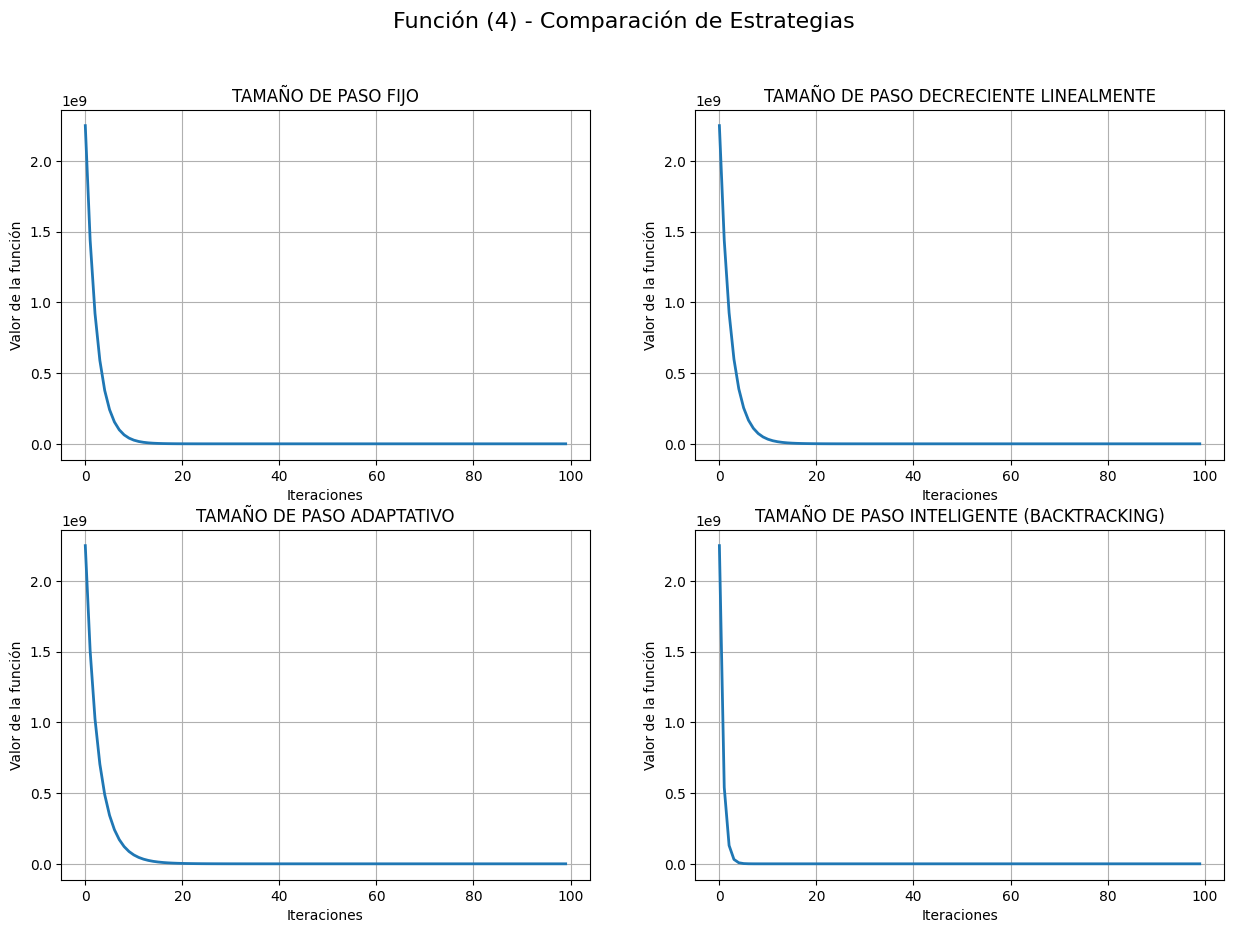

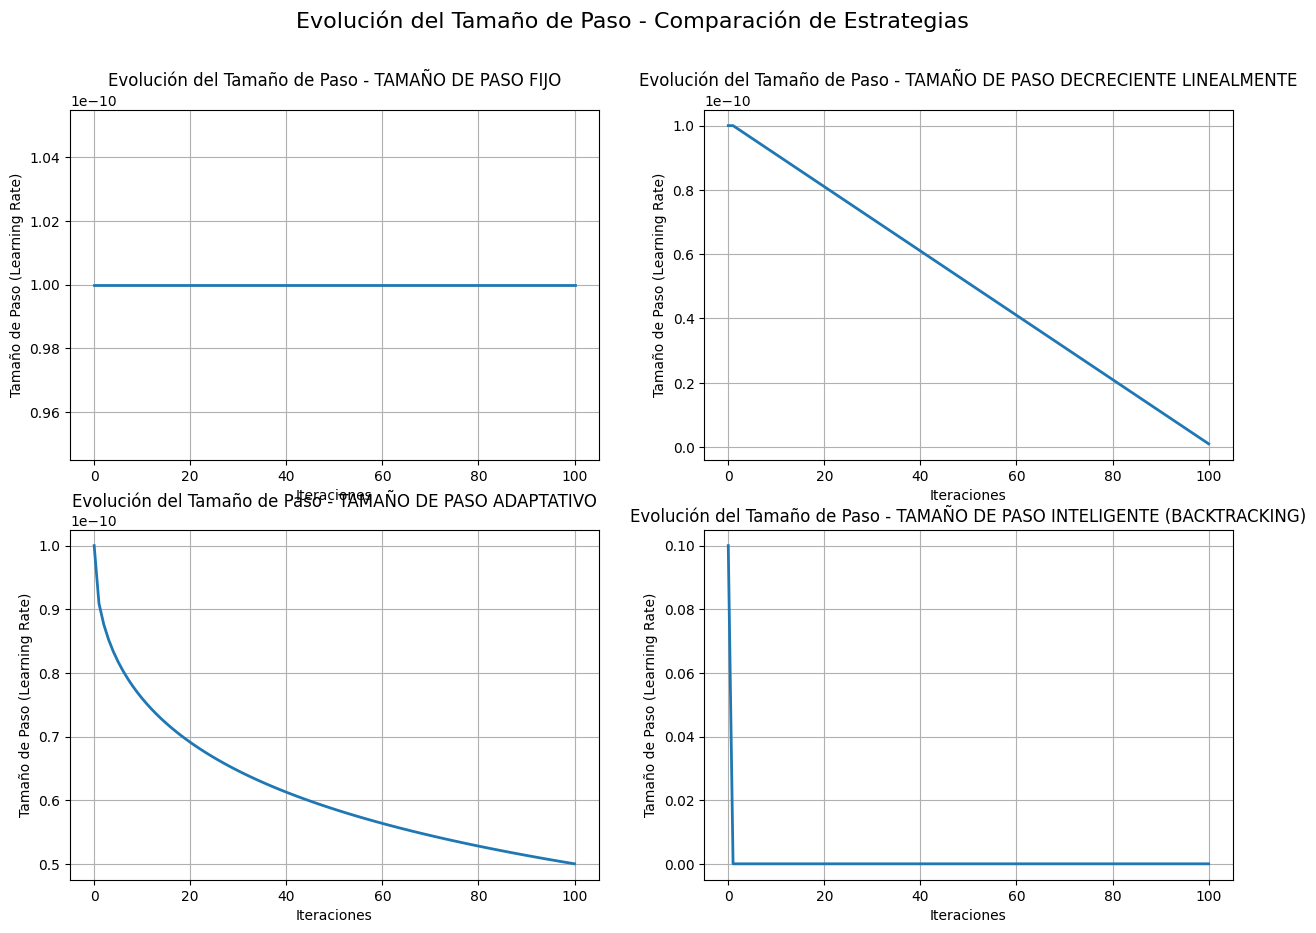

In [17]:
print("======= OPTIMIZACIÓN DE LA FUNCIÓN (4) =======")

lr_strategies = {
    'fixed': 1e-10, 
    'linear_decreasing': 1e-10, 
    'adaptive': 1e-10, 
    'intelligent': 1e-1
}
lr_names = ["TAMAÑO DE PASO FIJO", 
            "TAMAÑO DE PASO DECRECIENTE LINEALMENTE",
            "TAMAÑO DE PASO ADAPTATIVO", 
            "TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)"]

trayectories = []
lr_histories = []

for schedule, lr, name in zip(lr_strategies.keys(), lr_strategies.values(), lr_names):
    x_sphere, trayectory_sphere, lr_history_sphere = sd_algorithm.optimize(
        func=function4,
        x0=x0,
        lr=lr,
        h=1e-5,
        max_iterations=100,
        stop_value=1e-4,
        lr_schedule_type=schedule
    )
    trayectories.append(trayectory_sphere)
    lr_histories.append(lr_history_sphere)
    print("="*60)
    print(name)
    print("="*60)
    print("Valor óptimo encontrado:", x_sphere)
    print("Valor de la función en el óptimo:", function4(x_sphere))
    print("Número de iteraciones:", len(trayectory_sphere))

print("="*60)
print("Gráfica Descenso de la función:")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, history, name in zip(axs.flatten(), trayectories, lr_names):
    ax.plot(history, linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Valor de la función')
    ax.grid(True)

plt.suptitle('Función (4) - Comparación de Estrategias', fontsize=16)
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for ax, lr_history, name in zip(axs.flatten(), lr_histories, lr_names):
    ax.plot(lr_history, linewidth=2)
    ax.set_title(f"Evolución del Tamaño de Paso - {name}")
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Tamaño de Paso (Learning Rate)')
    ax.grid(True)
plt.suptitle('Evolución del Tamaño de Paso - Comparación de Estrategias', fontsize=16)
plt.show()

======= OPTIMIZACIÓN DE LA FUNCIÓN (4) NORMALIZADA =======
TAMAÑO DE PASO FIJO
Valor óptimo encontrado: [0.00566684 0.00566684]
Valor de la función en el óptimo: 6.4226146171508e-05
Número de iteraciones: 26
TAMAÑO DE PASO DECRECIENTE LINEALMENTE
Valor óptimo encontrado: [0.00625746 0.00625746]
Valor de la función en el óptimo: 7.831165652926425e-05
Número de iteraciones: 30
TAMAÑO DE PASO ADAPTATIVO
Valor óptimo encontrado: [0.00249433 0.00249433]
Valor de la función en el óptimo: 1.2443384915832409e-05
Número de iteraciones: 4
TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)
Valor óptimo encontrado: [0.00585938 0.00585937]
Valor de la función en el óptimo: 6.866455078688986e-05
Número de iteraciones: 5
Gráfica Descenso de la función:


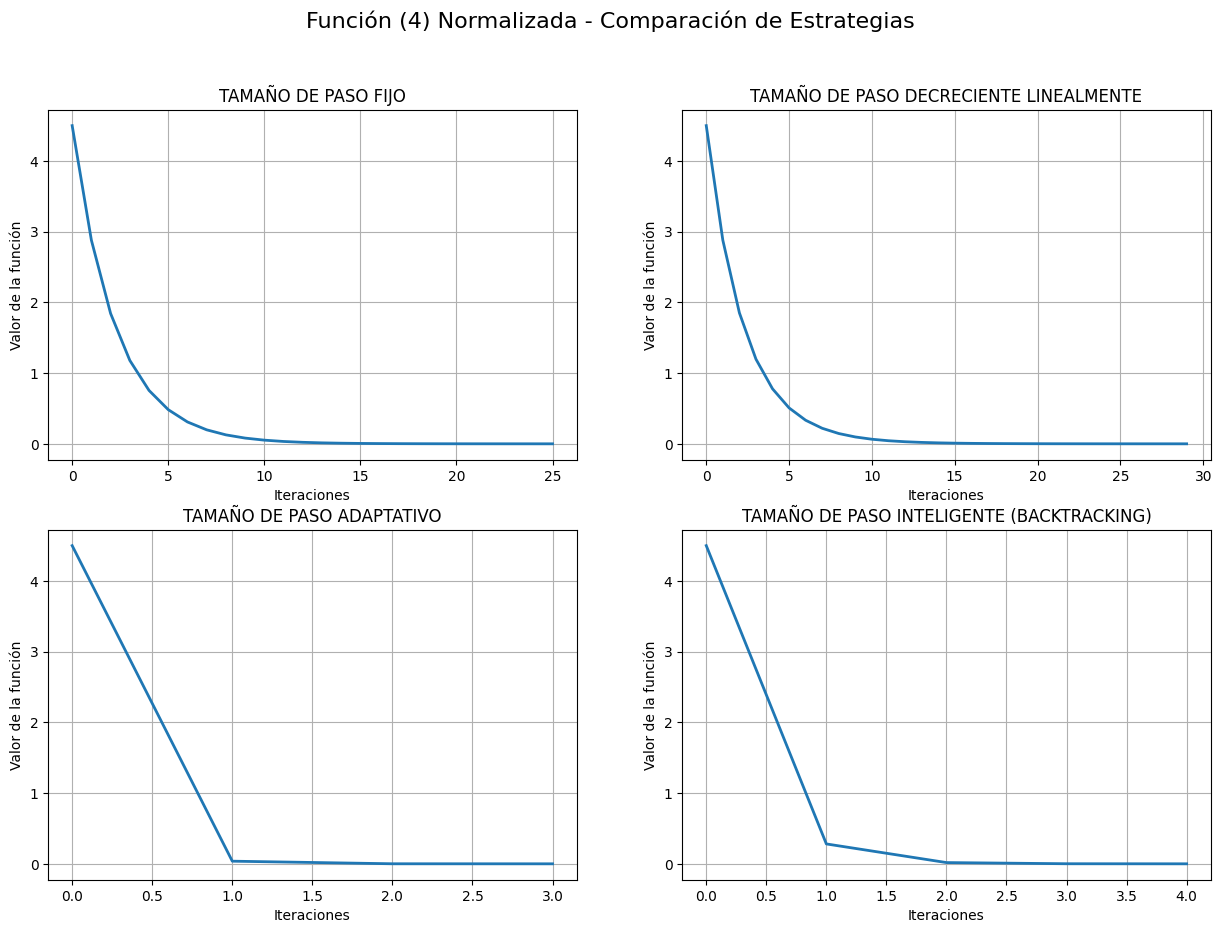

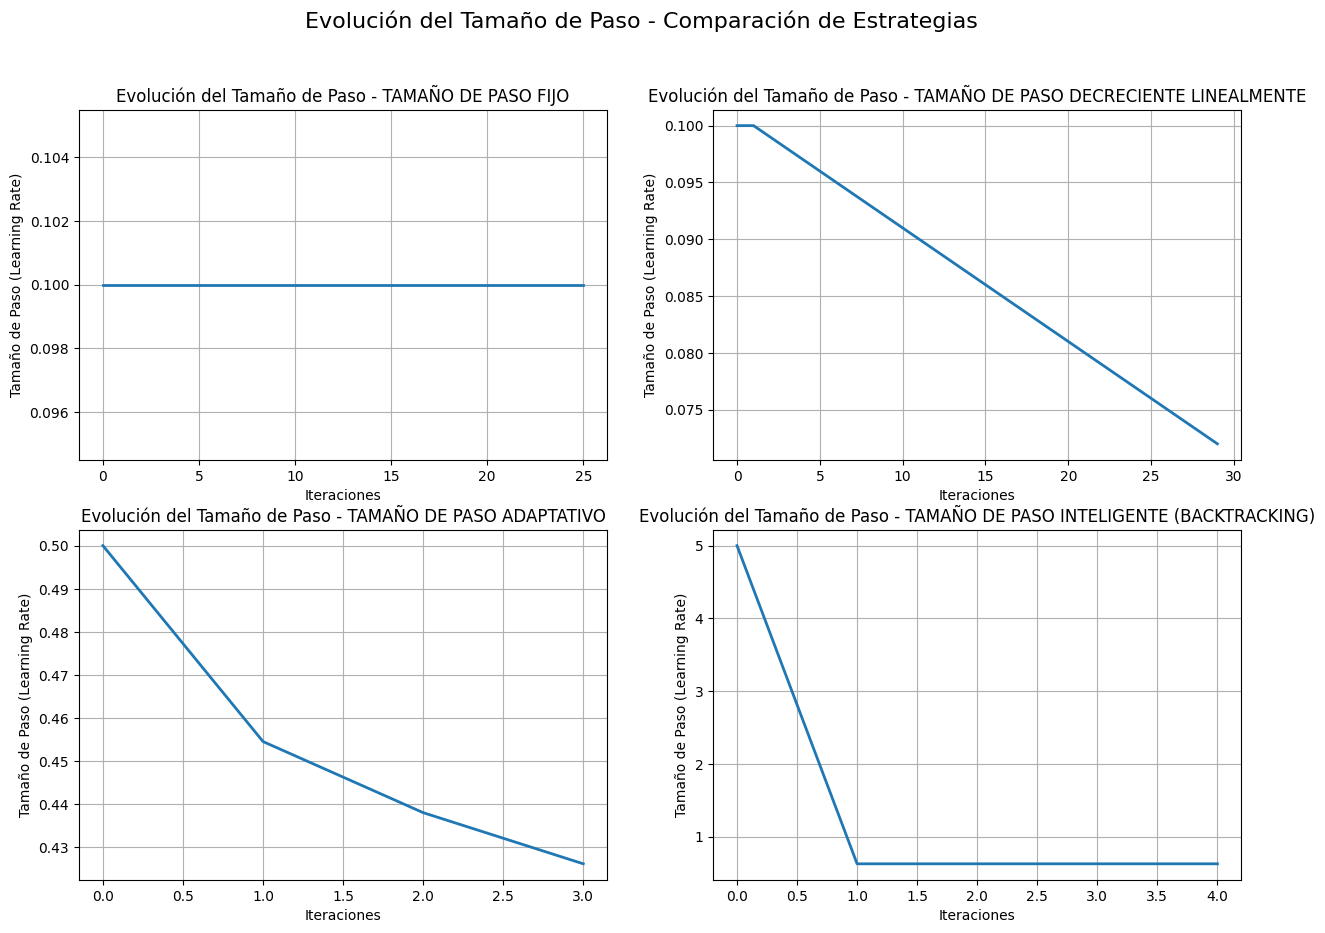

In [21]:
print("======= OPTIMIZACIÓN DE LA FUNCIÓN (4) NORMALIZADA =======")

lr_strategies = {
    'fixed': 0.1, 
    'linear_decreasing': 0.1, 
    'adaptive': 0.5, 
    'intelligent': 5
}
lr_names = ["TAMAÑO DE PASO FIJO", 
            "TAMAÑO DE PASO DECRECIENTE LINEALMENTE",
            "TAMAÑO DE PASO ADAPTATIVO", 
            "TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)"]

trayectories = []
lr_histories = []

for schedule, lr, name in zip(lr_strategies.keys(), lr_strategies.values(), lr_names):
    x_sphere, trayectory_sphere, lr_history_sphere = sd_algorithm.optimize(
        func=function4_normalized,
        x0=x0,
        lr=lr,
        h=1e-5,
        max_iterations=100,
        stop_value=1e-4,
        lr_schedule_type=schedule
    )
    trayectories.append(trayectory_sphere)
    lr_histories.append(lr_history_sphere)
    print("="*60)
    print(name)
    print("="*60)
    print("Valor óptimo encontrado:", x_sphere)
    print("Valor de la función en el óptimo:", function4_normalized(x_sphere))
    print("Número de iteraciones:", len(trayectory_sphere))

print("="*60)
print("Gráfica Descenso de la función:")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, history, name in zip(axs.flatten(), trayectories, lr_names):
    ax.plot(history, linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Valor de la función')
    ax.grid(True)

plt.suptitle('Función (4) Normalizada - Comparación de Estrategias', fontsize=16)
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for ax, lr_history, name in zip(axs.flatten(), lr_histories, lr_names):
    ax.plot(lr_history, linewidth=2)
    ax.set_title(f"Evolución del Tamaño de Paso - {name}")
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Tamaño de Paso (Learning Rate)')
    ax.grid(True)
plt.suptitle('Evolución del Tamaño de Paso - Comparación de Estrategias', fontsize=16)
plt.show()